<a href="https://colab.research.google.com/github/erlanggadewa/Sentiment-Analysis-Review-Steam/blob/main/Roberta-preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visit **ChrisMcCormickAI** on YouTube for more explanation.
[Image Reference](https://colab.research.google.com/drive/1Y4o3jh3ZH70tl6mCd76vz_IxX23biCPP#scrollTo=86C9objaKu8f)

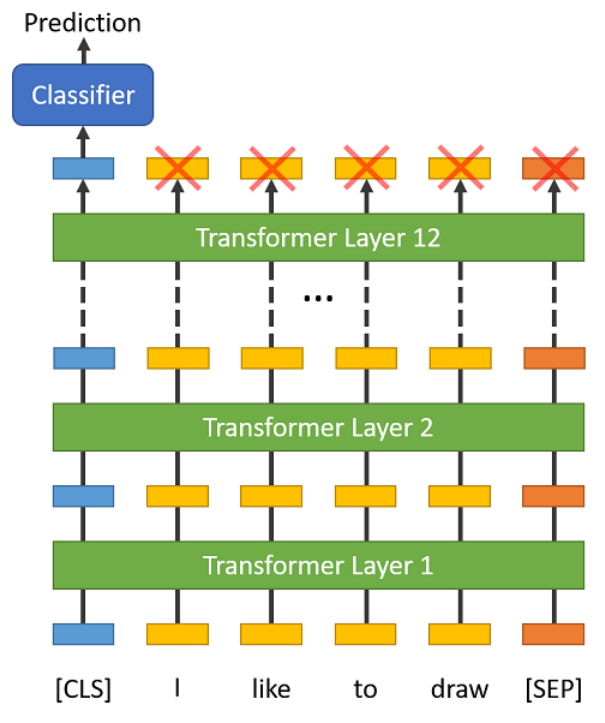

## **1. Cek resource**

In [1]:
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')

  print('there are %d GPU(s) available.' % torch.cuda.device_count())

  print('we will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [2]:
!pip install transformers

In [3]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=5c50095277e664e2a68b331bcc427df884b73b9d7bac02e24e04503e0770930c
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


## **2. Download & load dataset**

In [ ]:
import wget
import os

print("Downloading dataset...")

url = 'https://github.com/erlanggadewa/Sentiment-Analysis-Review-Steam/releases/download/production/dataset.csv'

if not os.path.exists('./dataset.csv'):
  wget.download(url, './dataset.csv')

In [ ]:
import pandas as pd

df = pd.read_csv("./dataset.csv", delimiter=',')
df.shape

(5000, 2)

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("stopwords")

# Inisialisasi stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))


def cleansing(text):
    if not isinstance(text, str):
        text = str(text)
    # Hapus karakter non-ASCII
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    # Hapus tanda baca & simbol
    text = re.sub(r"[^\w\s]", "", text)


def transform(text):
    # Konversi ke huruf kecil
    text = text.lower()
    # Hapus angka
    text = re.sub(r"\d+", "", text)
    # Hapus stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Stemming (ubah ke kata dasar)
    words = [stemmer.stem(word) for word in words]
    # Gabungkan kembali teks
    text = " ".join(words)
    return text


# Fungsi preprocessing teks
def preprocess_text(text):
    text = cleansing(text)
    text = transform(text)
    return text


# Contoh dataset

df["sentiment"] = df["label"].map({"Positive": 1, "Negative": 0})
df["review"] = df["review"].apply(preprocess_text)
df.sample(5)

# Ekspor DataFrame ke file CSV
df.to_csv("clean-mini-dataset.csv", index=False)
df = pd.read_csv("./clean-mini-dataset.csv", delimiter=",")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<ipython-input-7-3638a25a03c5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=['#F55','#5A9'])  # Use countplot for direct label counts with custom colors


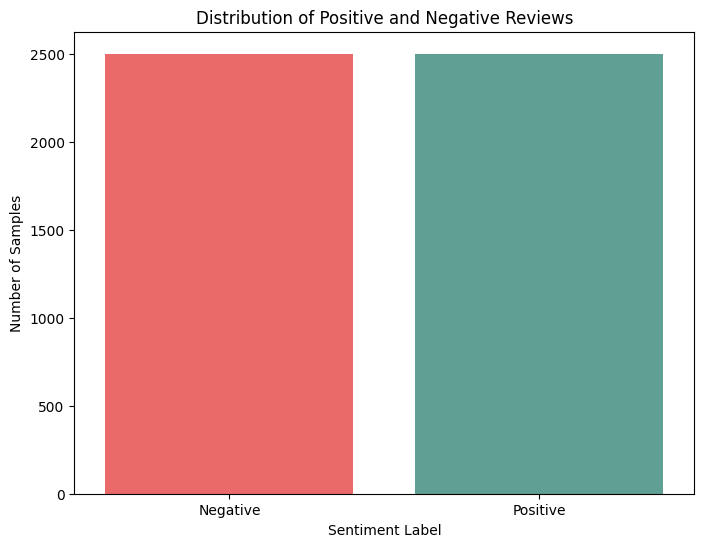

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting the distribution of labels with clearer visualization
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
sns.countplot(x='label', data=df, palette=['#F55','#5A9'])  # Use countplot for direct label counts with custom colors
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Samples')
plt.show()


In [8]:
sentences = df.review.values
labels = df.label.values
sentiments = df.sentiment.values

## **3. Load BERT Tokenizer**

In [ ]:
from transformers import DistilBertTokenizerFast

print("Loading BERT Tokenizer")
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Loading RoBERTa Tokenizer


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [10]:
df.sample(5)

,label,review,sentiment
1120,Negative,hey ive play elder scroll onlin year despit iv...,0
3250,Negative,worth,0
1783,Positive,recent came back mmo see chang better play bit...,1
2589,Positive,graphic forget realiti beauti good decent bad ...,1
585,Positive,nice graphic great gameplay smooth anim still ...,1


In [11]:
print("Original: ", sentences[0])

print("Tokenized: ", tokenizer.tokenize(sentences[0]))

print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))


Original:  first hour lull honestli game kinda blow next zero explor worth boss rush game combat isnt remot good enough carri boss tediou endur test horribl hitbox win condit game emphas dodg reward realli bizarr hitbox enemi invis wall around bodi mean cant underneath mean attack constantli whiff boss hop metr away complet avoid heavi attack win conditionbang head consort radahn frustrat fun still could feel progress know fail mess everytim fail boss ran hp surviv onslaught suspect hit detect tediou gimmick
Tokenized:  ['first', 'Ġhour', 'Ġlull', 'Ġhonest', 'li', 'Ġgame', 'Ġkinda', 'Ġblow', 'Ġnext', 'Ġzero', 'Ġexplor', 'Ġworth', 'Ġboss', 'Ġrush', 'Ġgame', 'Ġcombat', 'Ġis', 'nt', 'Ġrem', 'ot', 'Ġgood', 'Ġenough', 'Ġcar', 'ri', 'Ġboss', 'Ġt', 'edi', 'ou', 'Ġend', 'ur', 'Ġtest', 'Ġhor', 'rib', 'l', 'Ġhit', 'box', 'Ġwin', 'Ġcond', 'it', 'Ġgame', 'Ġemphas', 'Ġdod', 'g', 'Ġreward', 'Ġre', 'alli', 'Ġb', 'iz', 'arr', 'Ġhit', 'box', 'Ġen', 'emi', 'Ġinvis', 'Ġwall', 'Ġaround', 'Ġbod', 'i', 'Ġme

In [12]:
input_ids = []

for sent in sentences:
  # Check if sent is not nan before encoding
  if isinstance(sent, str) and sent != 'nan':
    encoded_sent = tokenizer.encode(
        sent,
        add_special_tokens = True
    )
    input_ids.append(encoded_sent)

print("Original: ", sentences[0])
print("Token IDs: ", input_ids[0])

Token indices sequence length is longer than the specified maximum sequence length for this model (581 > 512). Running this sequence through the model will result in indexing errors


Original:  first hour lull honestli game kinda blow next zero explor worth boss rush game combat isnt remot good enough carri boss tediou endur test horribl hitbox win condit game emphas dodg reward realli bizarr hitbox enemi invis wall around bodi mean cant underneath mean attack constantli whiff boss hop metr away complet avoid heavi attack win conditionbang head consort radahn frustrat fun still could feel progress know fail mess everytim fail boss ran hp surviv onslaught suspect hit detect tediou gimmick
Token IDs:  [0, 9502, 1946, 29620, 5322, 3572, 177, 24282, 4627, 220, 4276, 30262, 966, 3504, 6187, 177, 5217, 16, 3999, 6398, 1242, 205, 615, 512, 1069, 3504, 326, 19237, 1438, 253, 710, 1296, 17211, 8643, 462, 478, 8304, 339, 10022, 405, 177, 17237, 25744, 571, 7970, 769, 19273, 741, 1210, 6166, 478, 8304, 1177, 10613, 44955, 2204, 198, 28072, 118, 1266, 17672, 12213, 1266, 908, 5891, 3572, 36850, 3504, 13591, 1145, 338, 409, 14156, 90, 1877, 42287, 118, 908, 339, 1881, 31313, 47

In [13]:
def average(lst):
  """Calculates the average of a list of numbers.

  Args:
    lst: A list of numbers.

  Returns:
    The average of the numbers in the list.
  """
  return sum(lst) / len(lst)

print("Avg sentence length: ", average([len(sen) for sen in input_ids]))

Avg sentence length:  123.74101586026902


In [14]:
from keras.preprocessing.sequence import pad_sequences

MAX_LEN = 250

print("Padding/truncating all sentences to %d values" % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print("Done")

Padding/truncating all sentences to 250 values
Padding token: "<pad>", ID: 1
Done


In [15]:
input_ids[80]

array([    0,  2670,  2045,   372, 28651,   118, 14156,    90, 36986,
       12103,  1202,   118,   177,  1606,  1202,   118,   278,   253,
        1760,   190,  8875, 11134,  2662,   652,   655,   118,   908,
       22749, 33976,   575, 10064,  4039,    86,   185,     2,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [16]:
attention_mask = []

for sent in input_ids:
  att_mask = [int(token_id > 0) for token_id in sent]

  attention_mask.append(att_mask)


## **4. Persiapkan data**

In [17]:
from sklearn.model_selection import train_test_split

# Make sure input_ids and sentiments have the same length
num_samples = min(len(input_ids), len(sentiments))
input_ids = input_ids[:num_samples]
sentiments = sentiments[:num_samples]

train_input, test_input, train_sentiments, test_sentiments = train_test_split(input_ids,
                                                                      sentiments,
                                                                      random_state=2017,
                                                                      test_size=0.1)
train_mask, test_mask, _, _ = train_test_split(attention_mask,
                                               sentiments,
                                               random_state=2017,
                                               test_size=0.1)

train_input, validation_input, train_sentiments, validation_sentiments = train_test_split(train_input,
                                                                                  train_sentiments,
                                                                                  random_state=2018,
                                                                                  test_size=0.15)
train_mask, validation_mask, _, _ = train_test_split(train_mask,
                                                     train_mask,
                                                     random_state=2018,
                                                     test_size=0.15)

<ipython-input-18-6b5835b518d1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=['#5A9', '#F55'])  # Use countplot for direct label counts with custom colors


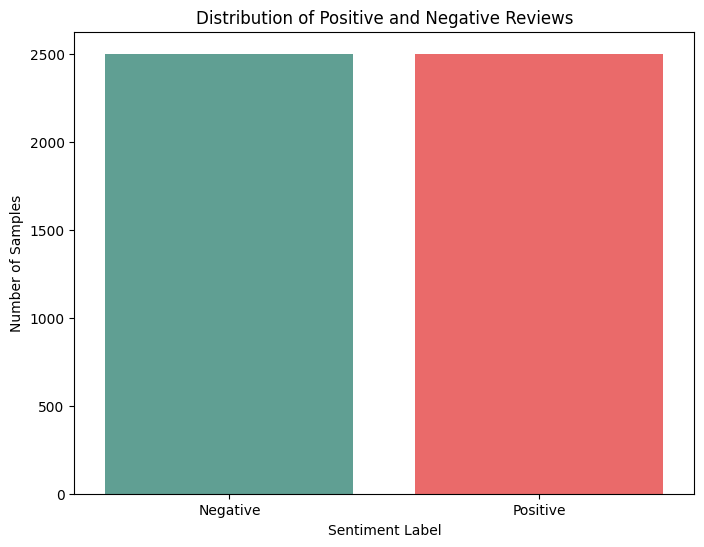

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of labels with clearer visualization
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
sns.countplot(x='label', data=df, palette=['#5A9', '#F55'])  # Use countplot for direct label counts with custom colors
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Samples')
plt.show()


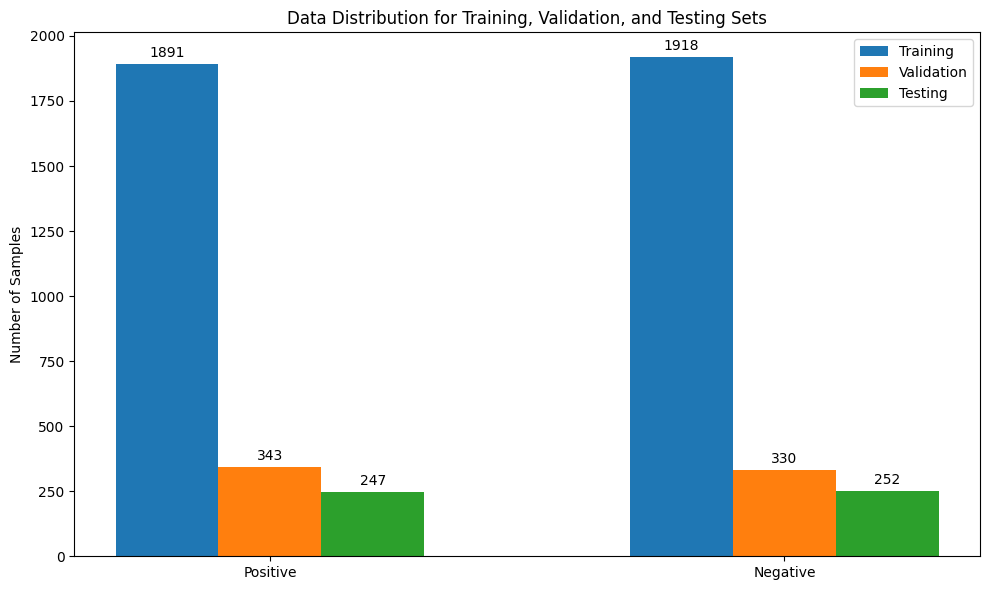

In [19]:

import matplotlib.pyplot as plt
import numpy as np


# Data for the plot (replace with your actual data)
data = {
    'Training': {'Positive': len(train_sentiments[train_sentiments == 1]), 'Negative': len(train_sentiments[train_sentiments == 0])},
    'Validation': {'Positive': len(validation_sentiments[validation_sentiments == 1]), 'Negative': len(validation_sentiments[validation_sentiments == 0])},
    'Testing': {'Positive': len(test_sentiments[test_sentiments == 1]), 'Negative': len(test_sentiments[test_sentiments == 0])}
}

# Create the bar plot
labels = ['Positive', 'Negative']
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, data['Training'].values(), width, label='Training')
rects2 = ax.bar(x, data['Validation'].values(), width, label='Validation')
rects3 = ax.bar(x + width, data['Testing'].values(), width, label='Testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Samples')
ax.set_title('Data Distribution for Training, Validation, and Testing Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

In [20]:

# Calculate the number of samples for each label in each dataset
train_df = pd.DataFrame({'label': train_sentiments})
validation_df = pd.DataFrame({'label': validation_sentiments})
test_df = pd.DataFrame({'label': test_sentiments})

train_counts = train_df['label'].value_counts()
validation_counts = validation_df['label'].value_counts()
test_counts = test_df['label'].value_counts()


# Print the counts for each dataset
print("Training Data:")
print(train_counts)
print("\nValidation Data:")
print(validation_counts)
print("\nTesting Data:")
print(test_counts)

# Create a summary table
summary_data = {'Dataset': ['Training', 'Validation', 'Testing'],
                'Positive': [train_counts.get(1, 0), validation_counts.get(1, 0), test_counts.get(1, 0)],
                'Negative': [train_counts.get(0, 0), validation_counts.get(0, 0), test_counts.get(0, 0)]}
summary_df = pd.DataFrame(summary_data)
print("\nSummary Table:")
summary_df

Training Data:
label
0    1918
1    1891
Name: count, dtype: int64

Validation Data:
label
1    343
0    330
Name: count, dtype: int64

Testing Data:
label
0    252
1    247
Name: count, dtype: int64

Summary Table:


,Dataset,Positive,Negative
0,Training,1891,1918
1,Validation,343,330
2,Testing,247,252


In [21]:
train_input = torch.tensor(train_input)
train_sentiments = torch.tensor(train_sentiments)
train_mask = torch.tensor(train_mask)

validation_input = torch.tensor(validation_input)
validation_sentiments = torch.tensor(validation_sentiments)
validation_mask = torch.tensor(validation_mask)

test_input = torch.tensor(test_input)
test_sentiments = torch.tensor(test_sentiments)
test_mask = torch.tensor(test_mask)

In [22]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_input, train_mask, train_sentiments)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_input, validation_mask, validation_sentiments)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_input, test_mask, test_sentiments)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

## **5. Persiapkan model pre-trained BERT**

In [ ]:
from transformers import DistilBertForSequenceClassification, AdamW, BertConfig

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [24]:
params = list(model.named_parameters())

print("The BERT model has {:} different named parameters.".format(len(params)))

print("==== Embedding Layer ====")
for p in params[0:5]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== First Transformers ====")
for p in params[5:21]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== Output Layer ====")
for p in params[-4:]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.
==== Embedding Layer ====
roberta.embeddings.word_embeddings.weight                    (50265, 768)
roberta.embeddings.position_embeddings.weight                  (514, 768)
roberta.embeddings.token_type_embeddings.weight                  (1, 768)
roberta.embeddings.LayerNorm.weight                                (768,)
roberta.embeddings.LayerNorm.bias                                  (768,)
==== First Transformers ====
roberta.encoder.layer.0.attention.self.query.weight            (768, 768)
roberta.encoder.layer.0.attention.self.query.bias                  (768,)
roberta.encoder.layer.0.attention.self.key.weight              (768, 768)
roberta.encoder.layer.0.attention.self.key.bias                    (768,)
roberta.encoder.layer.0.attention.self.value.weight            (768, 768)
roberta.encoder.layer.0.attention.self.value.bias                  (768,)
roberta.encoder.layer.0.attention.output.dense.weight          (768, 768)
robert

In [ ]:
learning_rate = 1e-5;
optimizer = AdamW(
    model.parameters(),
    lr = learning_rate,
    eps = 1e-8
)

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [26]:
from transformers import get_linear_schedule_with_warmup

epochs = 10

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                             num_warmup_steps = 0,
                                             num_training_steps = total_steps)

In [27]:
import numpy as np

def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [28]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

## **6. Training BERT**

In [29]:
import random
import time
import numpy as np
import torch

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []
validation_accuracies = []
test_accuracies = []

total_training_time = 0

for epoch_i in range(0, epochs):

  # ===================================
  #              Training
  # ===================================

  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time()

  total_loss = 0

  model.train()

  # For each batch of training data
  for step, batch in enumerate(train_dataloader):

    # Progress update every 40 batches
    if step % 40 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))

    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad()

    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

    loss = outputs[0]

    total_loss += loss.item()

    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)

  loss_values.append(avg_train_loss)

  epoch_training_time = time.time() - t0
  total_training_time += epoch_training_time

  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(epoch_training_time)))

  # ===================================
  #             Validation
  # ===================================

  print("Running Validation...")

  t0 = time.time()

  model.eval()

  eval_accuracy = 0
  nb_eval_steps = 0

  for batch in validation_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    eval_accuracy += tmp_eval_accuracy

    nb_eval_steps += 1

  avg_val_accuracy = eval_accuracy / nb_eval_steps
  validation_accuracies.append(avg_val_accuracy)

  print("   Accuracy: {0:.2f}".format(avg_val_accuracy))
  print("   Validation took: {:}".format(format_time(time.time() - t0)))

  # ===================================
  #             Testing
  # ===================================

  print("Running Testing...")

  t0 = time.time()

  model.eval()

  test_accuracy = 0
  nb_test_steps = 0

  for batch in test_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_test_accuracy = flat_accuracy(logits, label_ids)

    test_accuracy += tmp_test_accuracy

    nb_test_steps += 1

  avg_test_accuracy = test_accuracy / nb_test_steps
  test_accuracies.append(avg_test_accuracy)

  print("   Test Accuracy: {0:.2f}".format(avg_test_accuracy))
  print("   Testing took: {:}\n".format(format_time(time.time() - t0)))

print("Training complete!")
print("Total training time: {:}".format(format_time(total_training_time)))

======= Epoch 1 / 10 =======
Training...
Batch    40 of   120.     Elapsed: 0:00:50
Batch    80 of   120.     Elapsed: 0:01:41
   Average training loss: 0.68
   Training epoch took: 0:02:32
Running Validation...
   Accuracy: 0.47
   Validation took: 0:00:09
Running Testing...
   Test Accuracy: 0.50
   Testing took: 0:00:07

======= Epoch 2 / 10 =======
Training...
Batch    40 of   120.     Elapsed: 0:00:52
Batch    80 of   120.     Elapsed: 0:01:44
   Average training loss: 0.70
   Training epoch took: 0:02:35
Running Validation...
   Accuracy: 0.47
   Validation took: 0:00:09
Running Testing...
   Test Accuracy: 0.50
   Testing took: 0:00:07

======= Epoch 3 / 10 =======
Training...
Batch    40 of   120.     Elapsed: 0:00:52
Batch    80 of   120.     Elapsed: 0:01:44
   Average training loss: 0.70
   Training epoch took: 0:02:35
Running Validation...
   Accuracy: 0.47
   Validation took: 0:00:09
Running Testing...
   Test Accuracy: 0.50
   Testing took: 0:00:07

======= Epoch 4 / 10 =

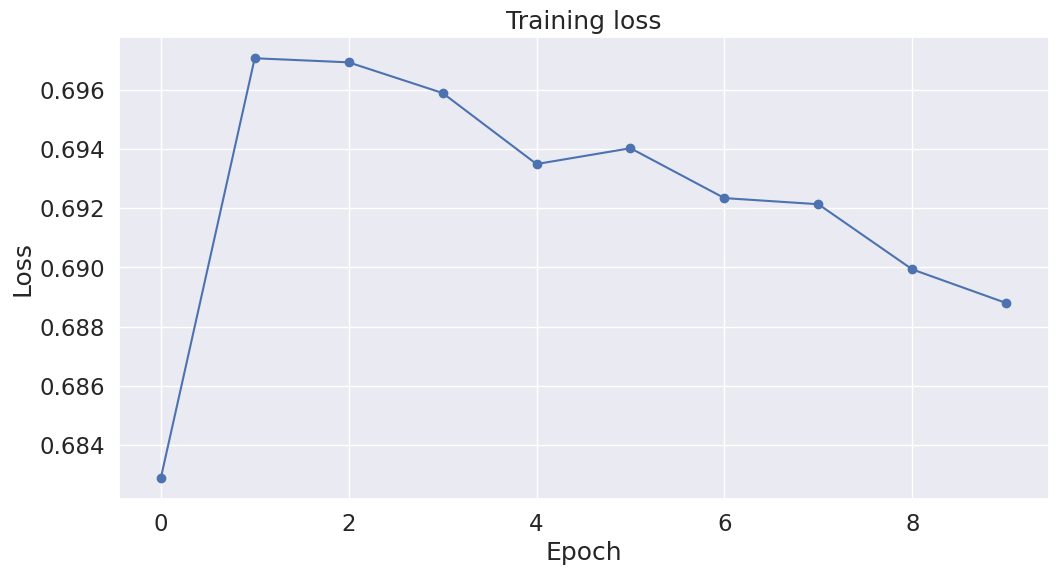

In [30]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

## **7. Predict dan Evaluate**

In [31]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print(" DONE.")

Predicting labels for 499 test sentences
 DONE.


In [32]:
from sklearn.metrics import matthews_corrcoef

flat_prediction = [item for sublist in prediction for item in sublist]
flat_prediction = np.argmax(flat_prediction, axis=1).flatten()

flat_true_labels = [item for sublist in true_labels for item in sublist]

mcc = matthews_corrcoef(flat_true_labels, flat_prediction)

print("MCC: %.3f" %mcc)

MCC: 0.000


In [33]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(flat_true_labels, flat_prediction)

print("ACC: %.3f" %acc)


ACC: 0.495



Hyperparameters:
- Learning Rate: 5e-05
- Batch Size: 32
- Epochs: 10
MCC: 0.00
ACC: 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       252
           1       0.49      1.00      0.66       247

    accuracy                           0.49       499
   macro avg       0.25      0.50      0.33       499
weighted avg       0.25      0.49      0.33       499



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


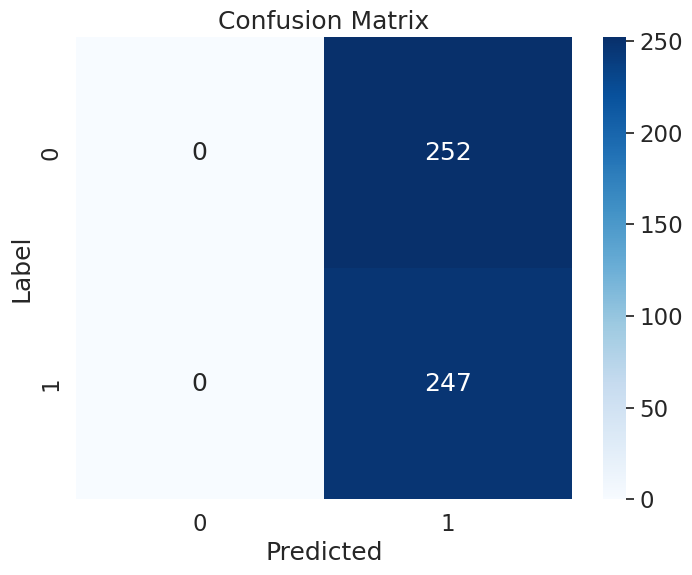

In [34]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# Additional information you might want to display:
# * Training time per epoch
# * Hyperparameters used (learning rate, batch size, epochs, etc.)
# * Number of training examples
# * Number of validation examples
# * Number of test examples
# * Model architecture details
# * Other relevant metrics, e.g., precision, recall, F1-score (if applicable)

# Example of displaying hyperparameters
print("\nHyperparameters:")
print(f"- Learning Rate: {learning_rate}")  # Replace with your actual learning rate
print(f"- Batch Size: {batch_size}") # Replace with your actual batch size
print(f"- Epochs: {epochs}") # Replace with your actual epoch number

mcc = matthews_corrcoef(flat_true_labels, flat_prediction)
print("MCC: %.2f" % mcc)

acc = accuracy_score(flat_true_labels, flat_prediction)
print("ACC: %.2f" % acc)

# Generate classification report
print(classification_report(flat_true_labels, flat_prediction))

# Generate and plot confusion matrix
cm = confusion_matrix(flat_true_labels, flat_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Label")
plt.title("Confusion Matrix")
plt.show()